(ref:lec4:ex1_sol)=
# Solutions of Exercise 4.1

```{figure} res/ex1.svg
---
height: 200
name: fig:lec4:ex1_sol:car
---
Block diagram of the electric car
```

The cruise controller of an electric car works by adjusting the voltage applied to the electric motor to regulate the velocity, making sure it is as close as possible to the speed setpoint coming from the driver. The system has the following dynamics:

**Electric Dynamics** (Voltage $\to$ Current): $G_2(s) = \frac{90}{s + 100}$

**Mechanical Dynamics** (Current $\to$ Speed): $G_1(s) = \frac{5}{s + 0.2}$

The block diagram of the car is shown in {numref}`fig:lec4:ex1_sol:car`. Both the motor current and the car velocity are measured, respectively with an [Hall-effect sensor](https://en.wikipedia.org/wiki/Hall_effect_sensor) and a [speedometer](https://en.wikipedia.org/wiki/Speedometer).
   
1. Sketch the block diagram of the system when a cascade control scheme is used. What are the control variable, the  *intermediate signal* that is fed back in the internal loop, and the output?
2. We start designing the cascade control scheme by the inner controller. Assume that we use a proportional controller $F_i(s) = K_2$. Design $K_2$ so that the bandwidth of the inner loop is at least $50$ rad/s and the steady-state error of this internal loop is no larger than $1\%$.
3. We now design the controller for the outer loop as a proportional controller $F(s) = K_1$. Choose $K_1$ so that the bandwidth of the closed-loop is at least $1$ rad/s.
4. Compute the steady-state output tracking error of the closed-loop. How can you modify the scheme so that the steady-state error is exactly zero?

---

## Solution

### Question 1

The cascade control scheme is implemented by closing the inner loop with the current measurement, and the outer loop with the speed measurement. The resulting block diagram is depicted below.

```{figure} res/ex1-sol1.svg
---
height: 200
name: fig:lec4:ex1:cascade
---
Cascade control scheme.
```

### Question 2

The inner control loop is characterized by the open-loop transfer function $G_{o2}(s) = F_i(s) \cdot G_2(s) = \frac{90 K_2}{s + 100}$, and by the closed-loop transfer function

$$
G_{c2}(s) = \frac{G_{o2}(s)}{1 + G_{o2}(s)} = \frac{\frac{90 K_2}{s + 100}}{1 + \frac{90 K_2}{s + 100}} = \frac{90 K_2}{s + (100 + 90 K_2)}
$$ (eq:lec4:ex1:Gc2)

This closed-loop is stable if $100 + 90 K_2 > 0$, i.e. $K > - \frac{10}{9}$. Therefore, any $K_2 > 0$ ensures closed-loop stability.

According to the Final Value Theorem, at steady state the output tracking error of $G_{c2}(s)$ is

$$
e_\infty = \lim_{s \to 0} \cancel{s} \big[ 1 - G_{c2}(s) \big] \frac{1}{\cancel{s}} = \lim_{s \to 0} \big[ 1 - G_{c2}(s) \big] = 1 - \frac{90 K_2}{100 + 90 K_2}
$$

The static error is less than $1\%$ if $\frac{90 K_2}{100 + 90 K_2} \geq 1 - 0.01$, that is

$$
\frac{90 K_2}{100 + 90 K_2} \geq 0.99 \quad \implies \quad K_2 \geq \frac{99}{89.1} \quad \implies \quad K_2 \geq 110
$$

As for the bandwidth requirement, $\omega_B$ is defined as the frequency where $\lvert G_{c2}(i \omega_B)  \lvert = \frac{\lvert G_{c2}(0)  \lvert}{\sqrt{2}}$. Under the reasonable assumption[^wb] that $\lvert G_{c2}(0)  \lvert \approx 1$, we can consider the simpler definition $\lvert G_{c2}(i \omega_B)  \lvert = \frac{1}{\sqrt{2}}$, or equivalently $\lvert G_{c2}(i \omega_B)  \lvert_{\text{dB}} = -3$ dB.

$$
\lvert G_{c2}(i \omega) \lvert = \frac{\lvert 90 K_2 \lvert}{\lvert i\omega + (100 + 90 K_2)\lvert} = \frac{\lvert 90 K_2 \lvert}{\sqrt{\omega^2 + (100 + 90 K_2)^2}}
$$

Therefore, we need to solve $\lvert G_{c2}(i 50) \lvert = \frac{1}{\sqrt{2}}$ for $K_2$

$$
\frac{90 K_2}{\sqrt{50^2 + (100 + 90 K_2)^2}} = \frac{1}{\sqrt{2}}
$$

Since both sides are positive for any $K_2 > 0$, we can square them and re-arrange the equations as follows

$$
16200 K_2^2 = 2500 + 10000 + 18000 K_2 + 8100 K_2^2
$$

We can divide both sides by $100$ and solve by $K_2$

$$
81 K_2^2 - 180 K_2 - 125 = 0 \qquad \Rightarrow \quad K_2 \simeq 2.8
$$

Any $K_2 > 2.8$ guarantees a bandwidth larger than $50$ rad/s.

**Solution**: Both requirements are satisfied when $K \geq 110$. Let's check this with MATLAB.

In [ ]:
set(groot, 'defaultLineLineWidth', 2)

In [16]:
s = tf('s');
G_2 = 90 / (s + 100);
K_2 = 110;
G_o2 = K_2 * G_2;           % Open-loop transfer function
G_c2 = G_o2 / (1 + G_o2);   % Closed-loop transfer function

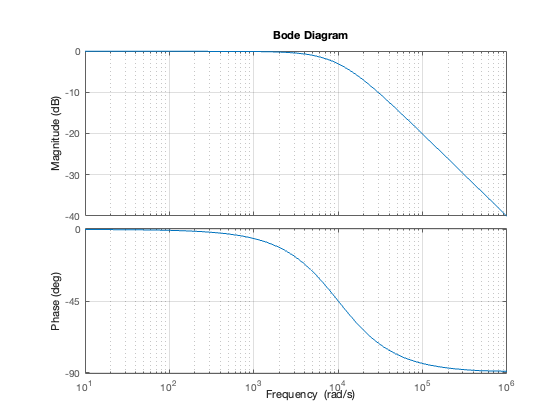

In [17]:
figure;
bode(G_c2); grid on;

In [18]:
[mag, phase, wout] = bode(G_c2); % Get the magnitude, phase, and frequency data
w_b = wout(find(mag < 1 / sqrt(2), 1, 'first'));
disp(['Bandwidth: ', num2str(w_b), ' rad/s'])
disp(['Static gain: ', num2str(dcgain(G_c2))])

Bandwidth: 10000 rad/s
Static gain: 0.99


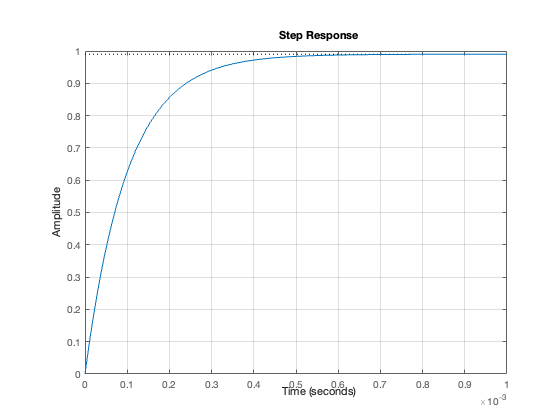

Step response information: 
         RiseTime: 2.1970e-04
    TransientTime: 3.9121e-04
     SettlingTime: 3.9121e-04
      SettlingMin: 0.8910
      SettlingMax: 0.9893
        Overshoot: 0
       Undershoot: 0
             Peak: 0.9893
         PeakTime: 7.3222e-04



In [19]:
figure; 
step(G_c2, 1e-3); grid on;

if exist('stepinfo')
    disp('Step response information: '); disp(stepinfo(G_c2))
end

### Question 3

At this stage, we approximate $G_{c2}(s) \approx 1$. Therefore, the open-loop transfer function of the outer loop is

$$
G_{o1}(s) = F(s) G_1(s) = K_1 \frac{5 }{s + 0.2}
$$

The resulting closed-loop is 

$$
G_{c1}(s) = \frac{5 K_1}{s + (0.2 + 5 K_1)}
$$

The values of $K_1$ for which the bandwidth requirement is satisfied can be found in two ways: from the Bode plot of $G_{o1}(s)$, or analytically.

(ref:lec4:ex1:sol-q3:bode)=
#### From Bode plot

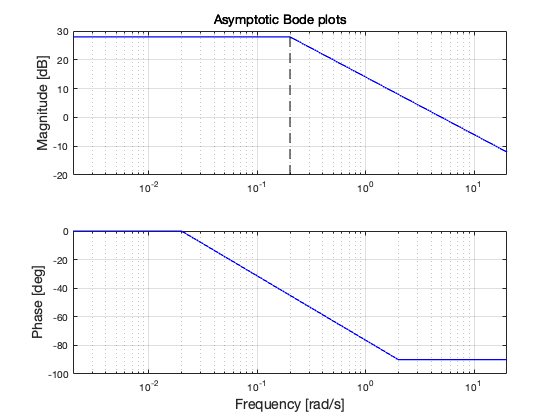

In [20]:
% Check if the `asymptotic_bode` function is available, otherwise download it
if ~exist('asymptotic_bode')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/asymptotic_bode.m', 'asymptotic_bode.m');
end

G_1 = 5 / (s + 0.2);
figure;
asymptotic_bode(G_1); grid on;

Let's recall that the bandwitdh $\omega_B$ can roughly be approximated as the critical frequency $\omega_c$ where $\lvert G_{o1}(i \omega) \lvert_{\text{dB}} = 0$ dB. Then, the magnitude of $G_1(s)$ at the target critical frequency $\omega_c = 1$ rad/s is $\lvert G_1(i 1) \lvert_{\text{dB}} \simeq 15$ dB. 
Therefore, since $\lvert G_{o1}(i \omega) \lvert_{\text{dB}} = \lvert G_{1}(i \omega) \lvert_{\text{dB}} + \lvert K_1 \lvert_{\text{dB}}$, the bandwidth requirement is satisfied by $K_1 > - 15$ dB. That is, $K_1 > 10^{\frac{-15}{20}} \simeq 0.18$.

#### Analytical solution

The bandwidth of $G_{c1}(s)$ is defined as the value of $\omega$ such that 

$$ 
\lvert G_{c1}(i \omega) \lvert = \frac{1}{\sqrt{2}} 
$$

We therefore solve $\lvert G_{c1}(i 1) \lvert = \frac{1}{\sqrt{2}}$ for $K_1$

$$
\lvert G_{c1}(i 1) \lvert  = \frac{\lvert 5 K_1 \lvert}{\sqrt{1^2 + (0.2 + 5 K_1)^2}} = \frac{1}{\sqrt{2}}
$$

Because both sides are positive for any $K_1 > 0$, we can square them. With some manipulation we get

$$
25 K_1^2 - 2 K_1 - 1.04 = 0  \quad \implies \quad K_1 \simeq 0.25
$$

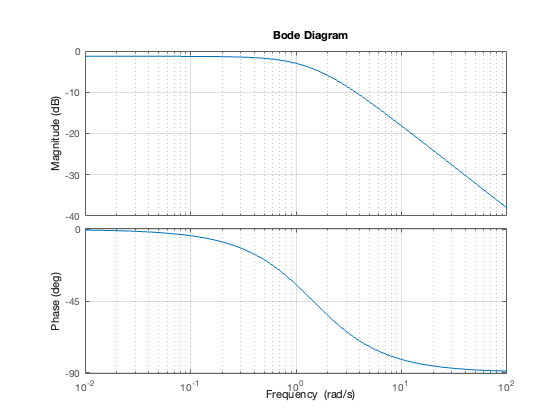

In [ ]:
K_1 = 0.25;
G_o1 = K_1 * G_1;
G_c1 = G_o1 / (1 + G_o1);

figure; 
bode(G_c1); grid on;

In [22]:
[mag, phase, wout] = bode(G_c1);  % Get the magnitude, phase, and frequency data
w_b = wout(find(mag < 1 / sqrt(2), 1, 'first'));
disp(['Bandwidth: ', num2str(w_b), ' rad/s'])
disp(['Static gain: ', num2str(dcgain(G_c1))])

Bandwidth: 1.0848 rad/s
Static gain: 0.86207


### Question 4



Recalling {eq}`eq:lec4:ex1:Gc2`, the overall closed-loop transfer function is

$$
G_c(s) = \frac{F(s) G_{c2}(s) G_1(s)}{1 + F(s) G_{c2}(s) G_1(s)} 
$$ (eq:lec4:ex1:Gc)

Picking $K_2 = 110$ and $K_1 = 0.25$, 

$$
G_c(s) = \frac{\frac{12375}{(s+0.2)(s + 10000)}}{1 + \frac{12375}{(s+0.2)(s + 10000)}} = \frac{12375}{s^2 + 10000.2 s + 14375}
$$

The steady-state error for a step reference is 

$e_\infty = \lim_{s \to 0} s \big[ 1 - G_c(s) \big] \frac{1}{s} = \frac{2000}{14375} \simeq 14 \%$

In [23]:
Gc = (K_1 * G_c2 * G_1) / (1 + K_1 * G_c2 * G_1);
disp(['Steady state error: ', num2str((1 - dcgain(Gc))*100), '%'])

Steady state error: 13.913%


This means that if the velocity target is $60$ km/h, the cruise control will reach $51$ km/h! 

### Question 4

To achieve zero steady-state error, it is enough to use a PI controller.

$$
F(s) = K_{1P} + \frac{K_{1I}}{s} = K_{1P} \cdot \frac{s + \frac{K_{1I}}{K_{1P}}}{s}
$$

The new open-loop transfer function (assuming $G_{c2}(s) = 1$ for the sake of simplicity) is 

$$
G_{o1}(s) = K_{1P} \cdot \frac{s + \frac{K_{1I}}{K_{1P}}}{s} \cdot \frac{5}{s + 0.2}
$$

Since $G_{o1}(s)$ is of type $g=1$ (i.e., it has $g=1$ poles in the origin), the steady-state error for step references is exactly $0$.

#### How to design the PI controller?

An easy design choice is to use the zero of the PI controller to cancel the pole of the system.

$$
\frac{K_{1I}}{K_{1P}} = 0.2
$$

In this way, $G_{o1}(s)$ becomes

$$
G_{o1}(s) = K_{1P} \cdot \frac{5}{s}
$$

The proportional gain $K_{1P}$ is designed so that the critical frequency $\omega_c$ is larger than the desired bandwidth $1$ rad/s. To this end, we can proceed in the same way as in the section {ref}`ref:lec4:ex1:sol-q3:bode`.

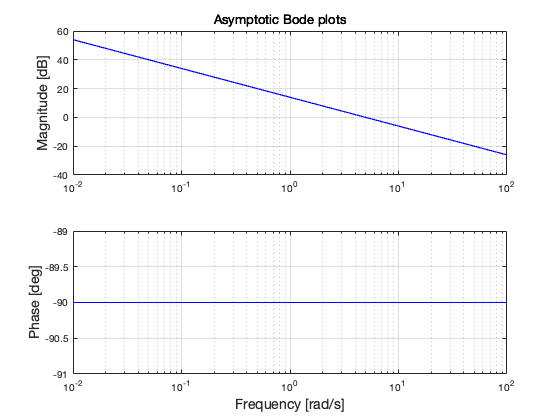

In [24]:
figure;
asymptotic_bode(5 / s); grid on;

In [25]:
mag_at_1 = mag2db(abs(freqresp(5 / s, 1)));
disp(['Magnitude at 1 rad/s: ', num2str(mag_at_1), ' dB'])

Magnitude at 1 rad/s: 13.9794 dB


**Solution**: $K_{1P} >  - 14$ dB guarantees the desired bandwidth. For example, $K_{1P} = 0.25$ and $K_{1I} = 0.2 \cdot K_{1P} = 0.05$.

Let's just check this solution with MATLAB.

In [26]:
F_PI = 0.25 + 0.05 / s;

Gc_new = (F_PI * G_c2 * G_1) / (1 + F_PI * G_c2 * G_1);
disp(['Steady state error: ', num2str((1 - dcgain(Gc_new))*100), '%'])

Steady state error: 0%


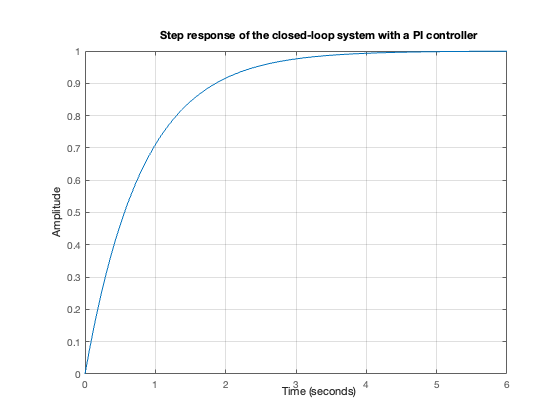

In [27]:
figure; 
step(Gc_new, 6); grid on;
title('Step response of the closed-loop system with a PI controller')

In [28]:
if exist('stepinfo')
    disp('Step response information: '); disp(stepinfo(Gc_new))
end

Step response information: 
         RiseTime: 1.7749
    TransientTime: 3.1618
     SettlingTime: 3.1618
      SettlingMin: 0.9088
      SettlingMax: 1.0000
        Overshoot: 0
       Undershoot: 0
             Peak: 1.0000
         PeakTime: 8.8557



[^wb]: A well-designed closed-loop transfer function has a unitary (or very close to unitary) static gain. For example, in the solution to Question 2 we have seen that for $K_2 > 110$ the static gain of the closed-loop transfer function is in the range $(0.99, 1.0)$. We can therefore opt for the definition $\lvert G_{c2}(i \omega_B)  \lvert = \frac{1}{\sqrt{2}}$, which is simpler because the right-hand side does not depend upon $K$.